# Credit Card Dataset

This project will explore a credit card dataset that summarizes the usage behavior of about 9000 active credit card holders during the last 6 months.

## Main Objectives

We will analyze the data and use machine learning algorithms to cluster the customers into segments, that will help with the customer segmentation for marketing strategy.

## Dataset
This dataset contains 18 behavioral variables, and it is available on [Kaggle](https://www.kaggle.com/arjunbhasin2013/ccdata)

* CUSTID : Identification of Credit Card holder (Categorical)  
* BALANCE : Balance amount left in their account to make purchases 
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)  
* PURCHASES : Amount of purchases made from account  
* ONEOFFPURCHASES : Maximum purchase amount done in one-go  
* INSTALLMENTSPURCHASES : Amount of purchase done in installment  
* CASHADVANCE : Cash in advance given by the user  
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)  
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)  
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)  
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid  
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"  
* PURCHASESTRX : Numbe of purchase transactions made  
* CREDITLIMIT : Limit of Credit Card for user  
* PAYMENTS : Amount of Payment done by user  
* MINIMUM_PAYMENTS : Minimum amount of payments made by user  
* PRCFULLPAYMENT : Percent of full payment paid by user  
* TENURE : Tenure of credit card service for user

## Exploratory Data Analysis

In [1]:
## Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We can drop the missing row on the CREDIT_LIMIT since there is only one row. Also will drop the CUST_ID column, as it is a unique column for each customer.
We will also fill the median value to fill the missing MINIMUM_PAYMENTS.

In [6]:
data.drop('CUST_ID', axis=1, inplace=True)

In [7]:
data.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [8]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)

### Visualizing the data

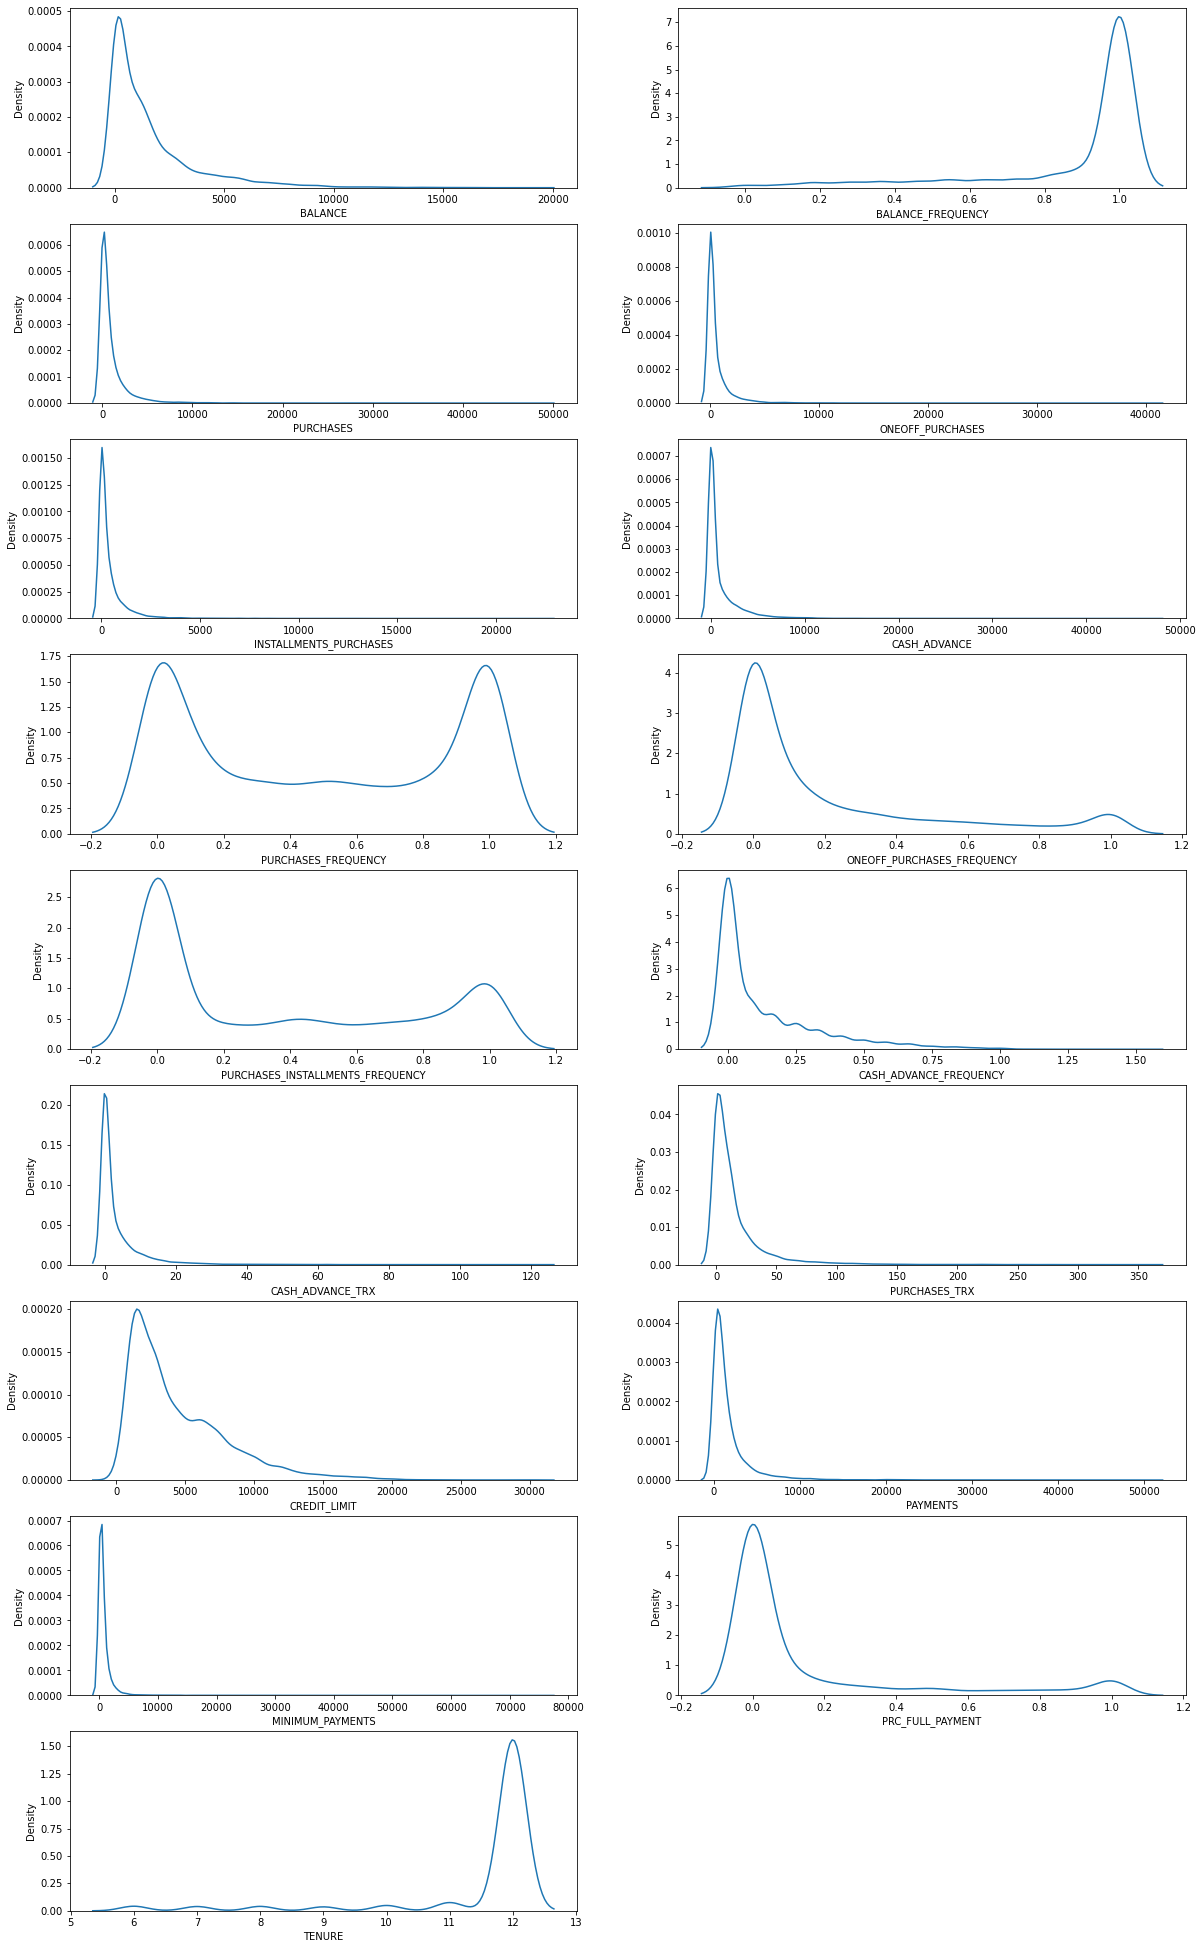

In [9]:
plt.figure(figsize=(20, 35))
for index, column in enumerate(data.columns):
    ax = plt.subplot(9, 2, index+1)
    sns.kdeplot(data[column], ax=ax)
    plt.xlabel(column)
    
plt.show()

We can clearly see that the data is skewed.

In [10]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [11]:
for col in cols:
    data[col] = np.log(1 + data[col])

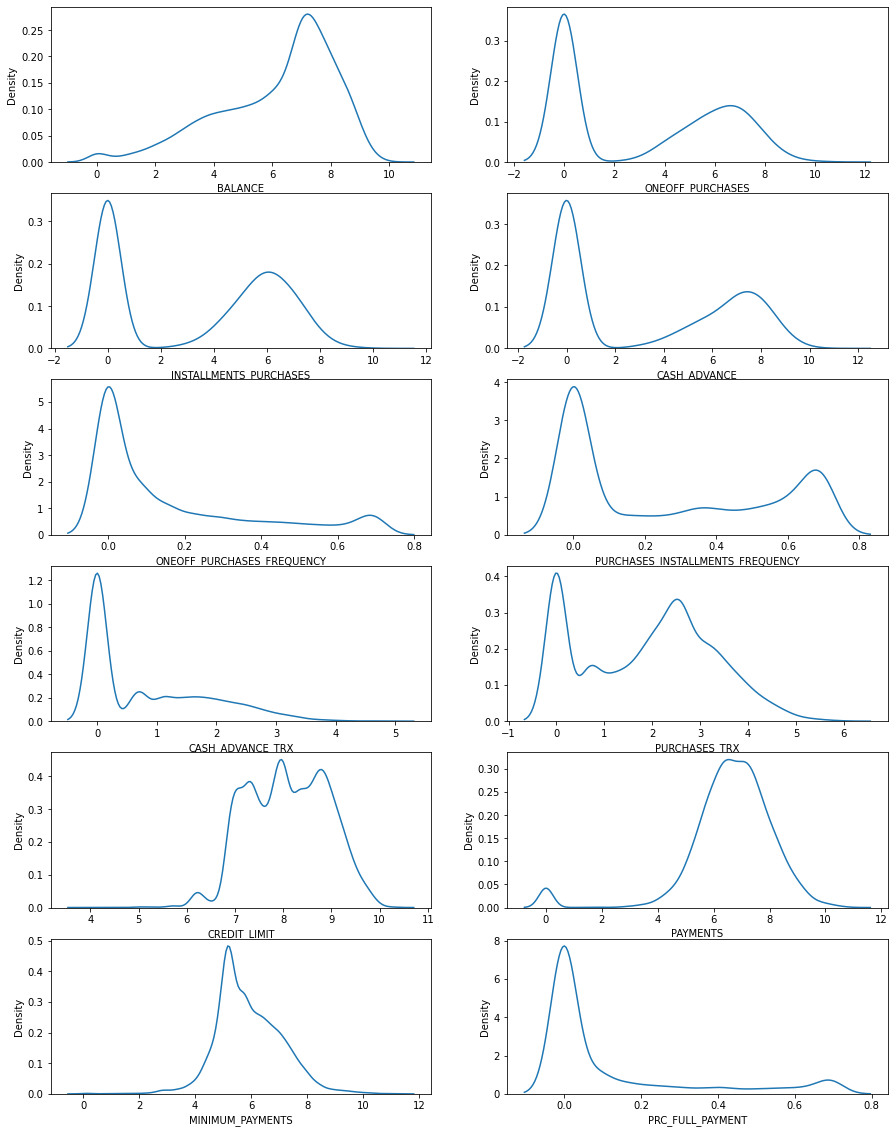

In [12]:
plt.figure(figsize=(15,20))
for index, column in enumerate(cols):
    ax = plt.subplot(6, 2, index+1)
    sns.kdeplot(data[column], ax=ax)
plt.show()

### Correlation

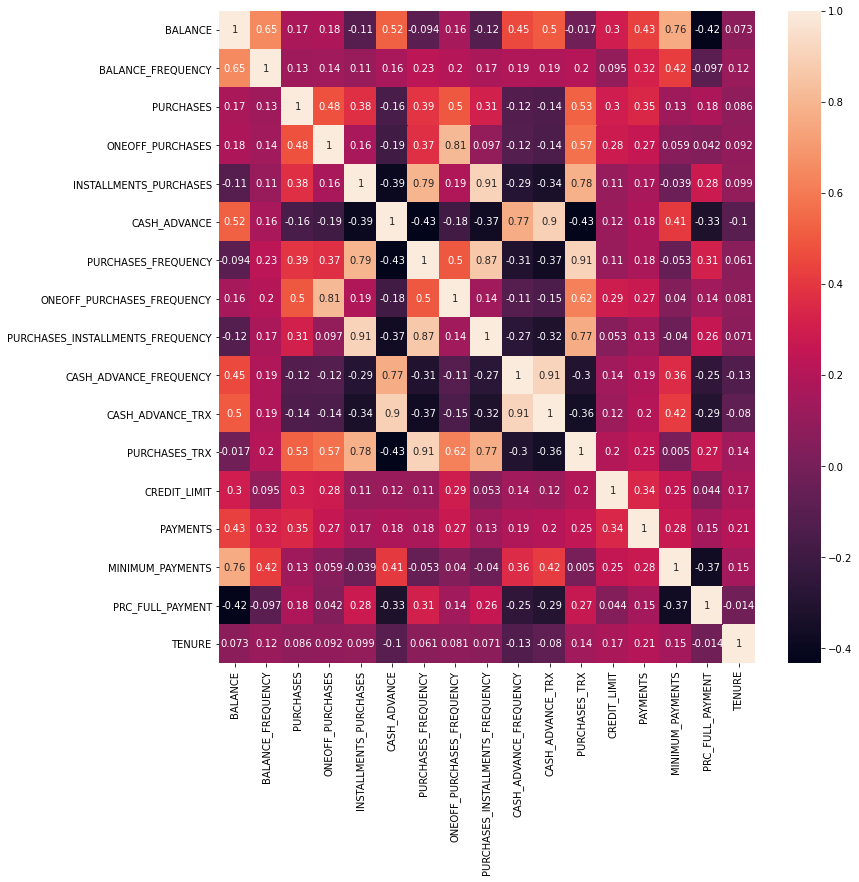

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [14]:
corr_mat = data.corr()
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,0.000000,0.652479,0.171555,0.180294,-0.111140,0.521825,-0.094183,0.155393,-0.116655,0.451977,0.504196,-0.017427,0.299845,0.428830,0.762650,-0.423093,0.073221
BALANCE_FREQUENCY,0.652479,0.000000,0.133586,0.140200,0.112387,0.164776,0.229440,0.202549,0.167758,0.192022,0.193710,0.200618,0.095072,0.321647,0.418795,-0.096746,0.118566
PURCHASES,0.171555,0.133586,0.000000,0.481976,0.375031,-0.155363,0.392991,0.496922,0.313845,-0.120137,-0.137567,0.529831,0.295569,0.348405,0.131382,0.180108,0.086155
ONEOFF_PURCHASES,0.180294,0.140200,0.481976,0.000000,0.161334,-0.190100,0.373551,0.813927,0.097062,-0.116676,-0.144825,0.574333,0.284856,0.266852,0.058759,0.041726,0.091590
INSTALLMENTS_PURCHASES,-0.111140,0.112387,0.375031,0.161334,0.000000,-0.394285,0.794754,0.191309,0.905433,-0.288378,-0.335658,0.782650,0.106571,0.165181,-0.038714,0.281505,0.098993
CASH_ADVANCE,0.521825,0.164776,-0.155363,-0.190100,-0.394285,0.000000,-0.432580,-0.184670,-0.368478,0.770265,0.898421,-0.430743,0.119436,0.182760,0.407652,-0.325714,-0.100309
PURCHASES_FREQUENCY,-0.094183,0.229440,0.392991,0.373551,0.794754,-0.432580,0.000000,0.500061,0.866295,-0.308483,-0.367199,0.909009,0.112639,0.175713,-0.053020,0.312615,0.061006
ONEOFF_PURCHASES_FREQUENCY,0.155393,0.202549,0.496922,0.813927,0.191309,-0.184670,0.500061,0.000000,0.143295,-0.111076,-0.146006,0.621670,0.289817,0.273988,0.040354,0.142166,0.081301
PURCHASES_INSTALLMENTS_FREQUENCY,-0.116655,0.167758,0.313845,0.097062,0.905433,-0.368478,0.866295,0.143295,0.000000,-0.270851,-0.315244,0.769811,0.053064,0.129401,-0.039693,0.262997,0.071298
CASH_ADVANCE_FREQUENCY,0.451977,0.192022,-0.120137,-0.116676,-0.288378,0.770265,-0.308483,-0.111076,-0.270851,0.000000,0.912544,-0.303004,0.139850,0.193768,0.361023,-0.252626,-0.133427


In [15]:
corr_mat.abs().idxmax()

BALANCE                                             MINIMUM_PAYMENTS
BALANCE_FREQUENCY                                            BALANCE
PURCHASES                                              PURCHASES_TRX
ONEOFF_PURCHASES                          ONEOFF_PURCHASES_FREQUENCY
INSTALLMENTS_PURCHASES              PURCHASES_INSTALLMENTS_FREQUENCY
CASH_ADVANCE                                        CASH_ADVANCE_TRX
PURCHASES_FREQUENCY                                    PURCHASES_TRX
ONEOFF_PURCHASES_FREQUENCY                          ONEOFF_PURCHASES
PURCHASES_INSTALLMENTS_FREQUENCY              INSTALLMENTS_PURCHASES
CASH_ADVANCE_FREQUENCY                              CASH_ADVANCE_TRX
CASH_ADVANCE_TRX                              CASH_ADVANCE_FREQUENCY
PURCHASES_TRX                                    PURCHASES_FREQUENCY
CREDIT_LIMIT                                                PAYMENTS
PAYMENTS                                                     BALANCE
MINIMUM_PAYMENTS                  

## Model Training

### Principal Component Analysis

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_red = pca.fit_transform(data)

### KMeans Clustering

In [17]:
from sklearn.cluster import KMeans

kmeans_models = []
inertia = []

for k in range(1,10):
    kn = KMeans(n_clusters=k, random_state=42)
    kmeans_models.append(kn.fit(X_red))
    
for model in kmeans_models:
    inertia.append(model.inertia_)

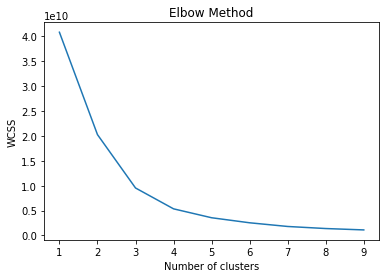

In [18]:
plt.plot(range(1,10), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

* We can see that per the elbow method, the optimal number of cluster is 3 or 4

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_red)

KMeans(n_clusters=3, random_state=42)

In [20]:
data['cluster_id'] = kmeans.labels_

In [21]:
# Inverting the log transformation that we did earlier
for col in cols:
    data[col] = np.exp(data[col])

In [22]:
sns.set_style('darkgrid')

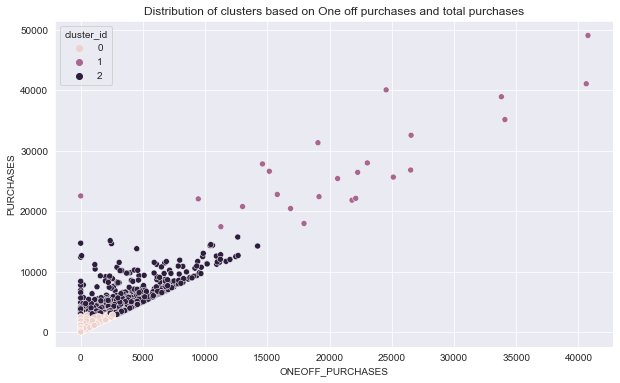

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

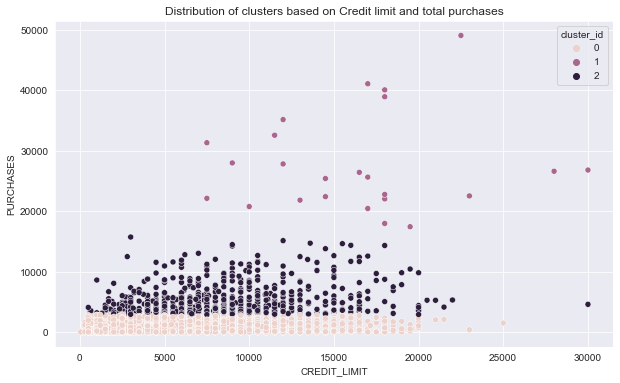

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

* We can clearly see that the KMeans cluster divided the customers into three segments, low credit usage, mid credit usage and high credit usage.

### Agglomerative Clustering

In [25]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=3, linkage='ward', compute_full_tree= True)
ag = ag.fit(X_red)

In [26]:
data['ag_id'] = ag.labels_

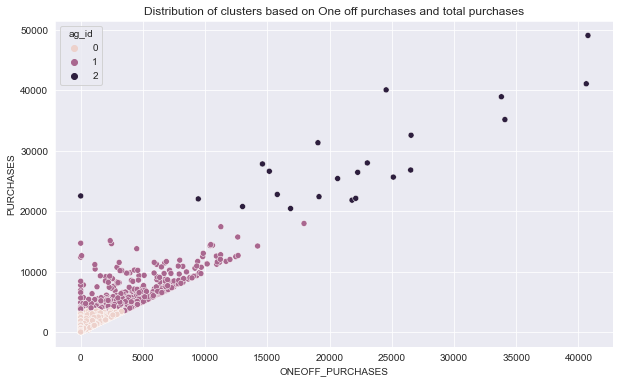

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='ONEOFF_PURCHASES', y='PURCHASES', hue='ag_id')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

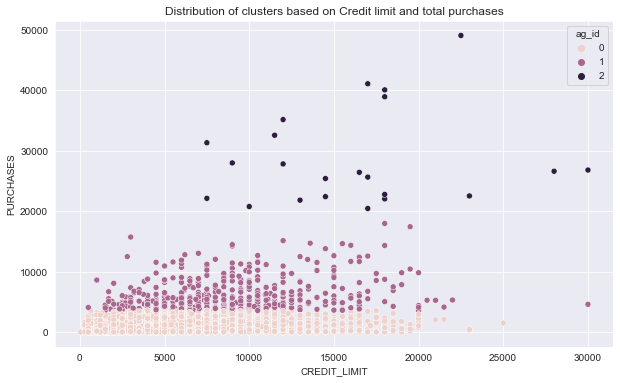

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='CREDIT_LIMIT', y='PURCHASES', hue='ag_id')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

### Hierarchical Clustering

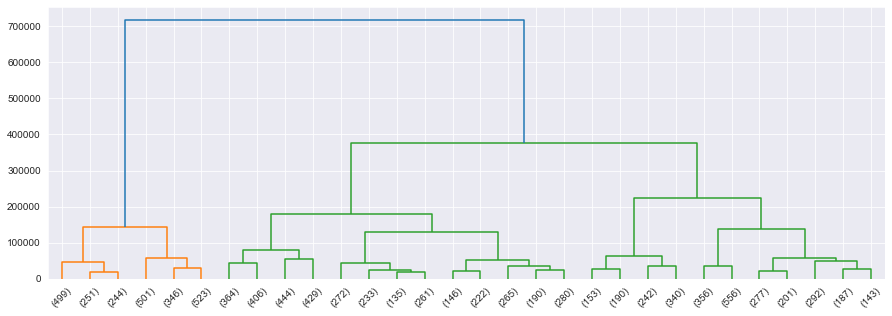

In [29]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='C0')

## Summary & Key Findings

I have visualized the data after clustering based on the one time puchases vs total puchases and also credit limit vs total puchases. Both KMeans clustering and Agglomerative clustering, cluster the same way with slight differences. 

If we look at the visualizations above, the main divider is the 20000 purchases for agglomerative clustering for the third cluster. KMeans clustering has a lower threshold (maybe around 17000) for the third cluster.